In [77]:
import pandas as pd
import seaborn as sns
import statistics as stts

## Previous Analysis

In [78]:
data = pd.read_csv('tempo.csv', sep=';')
data

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [79]:
# NaN values
display(data.isna().sum())

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [80]:
# Aparencia data
display(data.groupby('Aparencia').size())

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

<Axes: xlabel='Temperatura', ylabel='Count'>

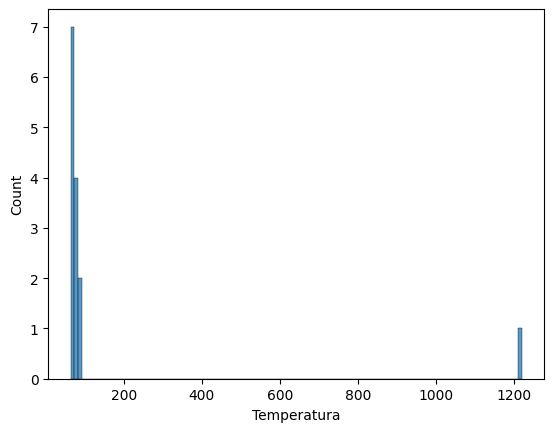

In [81]:
# Temperatura data
display(data['Temperatura'].describe())
# sns.boxplot(data['Temperatura'])
sns.histplot(data['Temperatura'])

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: xlabel='Umidade', ylabel='Count'>

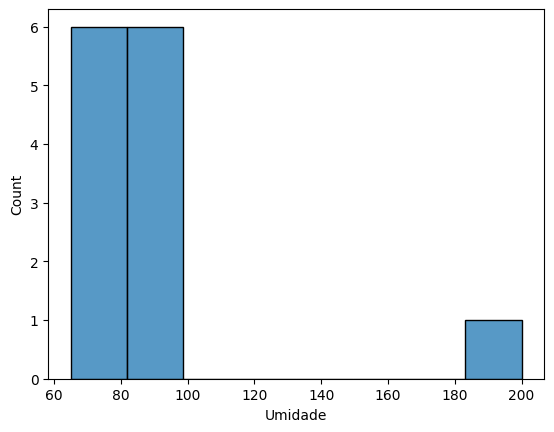

In [82]:
# Umidade data
display(data['Umidade'].describe())
# sns.boxplot(data['Umidade'])
sns.histplot(data['Umidade'])

In [83]:
# Vento data
display(data.groupby('Vento').size())

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [84]:
# Jogar data
display(data.groupby('Jogar').size())

Jogar
nao    5
sim    9
dtype: int64

## Data processing


Vento
FALSO         8
VERDADEIRO    6
dtype: int64

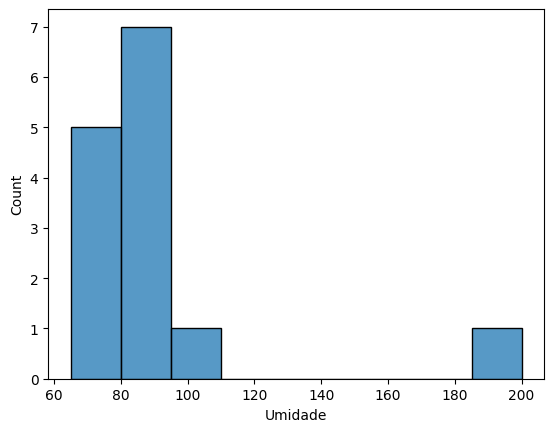

In [85]:
# NaN values

# Umidade
data.loc[data['Umidade'].isna(), 'Umidade'] = stts.median(data['Umidade'])
sns.histplot(data['Umidade'])

# Vento
data.loc[data['Vento'].isna(), 'Vento'] = 'FALSO'
data.groupby('Vento').size()

In [86]:
# Aparencia data

data.loc[data['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
data.groupby('Aparencia').size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [87]:
# Temperatura data

data.loc[data['Temperatura'] > 135, 'Temperatura'] = stts.median(data['Temperatura'])
data['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [88]:
# Umidade data
data.loc[data['Umidade'] > 100, 'Umidade'] = stts.median(data['Umidade'])
data['Umidade'].describe()

count    14.000000
mean     81.267857
std       9.576847
min      65.000000
25%      71.250000
50%      85.125000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64